# Task 2

Reproduce figure 5A (but use blue-white-red color palette instead of green-black-red); make another heatmap of gene expression 

Figure caption:

ILC Molecular Subtypes(A) Three molecular subtype of lobular breast cancer were identified based on differential gene expression and show unique patterns highly expressed genes(n = 1277, SAM FDR = 0, upper panel), minor difference in tumor purity measured by ABSOLUTE, and differences in gene expression signatures measuringproliferation, CD68, Macrophage-associated CSF1, Macrophage–associated TH1, and T Cell Receptor Signaling (lower panel). Proliferation is highest in theproliferative(Pro) andimmune-related(IR) subgroups; macrophage associated signaling is highest inimmune-relatedtumors.

Section describing the figure:

### ILC mRNA Subtypes

Using mRNA-seq expression data from LumA ILC samples
(n = 106), we identified three ILC subtypes termed reactive-like,
immune-related, and proliferative (Figures S5A–S5I, Table S8).
We then used a 3-class ILC subtype classifier (60 genes, Table
S13) to score all ILC samples in the TCGA (n = 127) (Figure 5A)
and METABRIC (Curtis et al., 2012) datasets (Table S12). Our
analyses identified many significant genomic features that distinguished each ILC subtype at the mRNA and protein/phosphoprotein level; but no distinguishing somatic mutations or DNA
copy-number alterations.
Significant analysis of microarray (SAM) analysis (Tusher et al.,
2001) identified 1,277 genes differentially expressed between
ILC subtypes (q = 0) (Figure 5A, Table S8). Of these, 1,005
were highly expressed in reactive-like tumors, which had lower
tumor purity as determined by ABSOLUTE (Carter et al., 2012)
(Figures 5A and S5P), and included genes consistent with
epithelial and stromal-associated signaling including keratin,
kallikrein, and claudin genes as well as the oncogenes EGFR,
MET, PDGFRA, and KIT (Table S8). The remaining 272 genes
were highly expressed in immune-related tumors and include
modulators of immunogenic signaling such as interleukins (IL),
chemokine receptors and ligands, major histocompatibility complex, and tumor necrosis factors, as well as IDO1 and IFNG
(Figure 5A and Table S8). Interestingly, immune activity in this
subset of tumors appears to be predominantly associated with
macrophage-associated signaling as increased levels of CD68
(p < 0.05), macrophage-associated colony stimulating factor
(MacCSF), macrophage-associated TH1 (MacTH1), and T cell
receptor (TCR) gene expression signatures (Iglesia et al., 2014)
were observed in both the TCGA (Figure 5A) and METABRIC
(Figure S5J–S5K) datasets. Finally, proliferative tumors were
defined by low expression of each of these 1,277 genes
(Figure 5A). Intriguingly, in each dataset (Figures 5 and S5K)
proliferative tumors had higher levels of proliferation relative
to reactive-like tumors (TCGA: p = 3.3E-09; METABRIC: p =
0.018) and slightly higher or equivalent levels compared to
immune-related ones (TGCA: p = 0.29; METABRIC: p = 0.008).
Regardless of ILC subtype, ILC tumor proliferation was generally
lower than all IDC subtypes (Figures S5L–S5M).

<img src="img/5A.png" alt="5A" width="300"/>

In [1]:
import pandas as pd
import numpy as np

## load the data

Source: supplementary material to https://www.cbioportal.org/study/summary?id=brca_tcga_pub2015

Adding subclasses, PAM50, Proliferation score, Tumor Puriy

In [2]:
xls = pd.ExcelFile("data/BRCA817_sample_subgroups.xlsx")
ilc_classification_df = pd.read_excel(xls, " ILC mRNA subtypes").iloc[:, 2:].drop(columns=["Final Pathology (3.26.14)"])
ilc_classification_df["Sample ID"] = ilc_classification_df["Case.ID"].apply(lambda x: x.replace(".", "-") + "-01")
ilc_classification_df = ilc_classification_df.sort_values(by=["ILC_Class_score 06.04.2014", "PAM50"]).drop(columns=["Case.ID"])
ilc_classification_df = ilc_classification_df.rename(columns={"ILC_Class_score 06.04.2014": "subclass"})
ilc_classification_df

,PAM50,TumorPurity,ProliferationScore,subclass,Sample ID
1,LumA,0.46,-0.635337,Class1,TCGA-AR-A1AK-01
2,LumA,0.50,-0.648647,Class1,TCGA-BH-A0HP-01
3,LumA,0.50,-0.895293,Class1,TCGA-A2-A0EX-01
5,LumA,0.33,-0.607052,Class1,TCGA-A2-A0YL-01
7,LumA,0.50,-0.759821,Class1,TCGA-A2-A3KC-01
...,...,...,...,...,...
125,LumA,0.79,-0.565745,Class3,TCGA-AC-A3TN-01
126,LumA,0.45,-0.161190,Class3,TCGA-E2-A107-01
117,LumB,0.78,-0.013830,Class3,TCGA-AR-A2LK-01
120,LumB,0.64,0.193688,Class3,TCGA-E9-A2JS-01


In [3]:
ilc_genes_df = pd.read_excel("data/1-s2.0-S0092867415011952-mmc9.xlsx").iloc[2:, 6:8].dropna()
ilc_genes_df.columns = ilc_genes_df.iloc[0]
ilc_genes_df = ilc_genes_df.drop(ilc_genes_df.index[0])
ilc_genes_df = ilc_genes_df.set_index(ilc_genes_df["GID| UID"].str.split("|", expand=True)[1].astype(int))
ilc_genes_df = ilc_genes_df.drop(columns=["GID| UID"])
ilc_genes_df.columns.name = ""
ilc_genes_df.head()

,Class High Expression (FDR=0)
1,
342667,Reactive-like
3861,Reactive-like
5650,Reactive-like
6663,Reactive-like
118430,Reactive-like


From here on the index of dataframes is the UID of the gene. The shapes of the df expected: 1277 genes and 127 samples, where we got 1277 genes and the expected number of samples. This is due to the fact that gene with Hugo Symbol ANXA8L2 and id 244 is present among the ilc genes, but not in the data_rna_seq_v2_expression_median.txt file.

In [4]:
rna_seq_df = pd.read_csv("data/data_RNA_Seq_v2_expression_median.txt", sep="\t")
gene_id_in_rna_seq = rna_seq_df["Entrez_Gene_Id"]
Hugo_Symbol_in_rna_seq = rna_seq_df["Hugo_Symbol"]
rna_seq_df = rna_seq_df.set_index(rna_seq_df["Entrez_Gene_Id"])
rna_seq_df = rna_seq_df.drop(columns=["Entrez_Gene_Id", "Hugo_Symbol"])
rna_seq_df_merged = rna_seq_df.merge(ilc_genes_df, right_index=True, left_index=True)
ilc_expression = rna_seq_df_merged[ilc_classification_df["Sample ID"]]
ilc_expression.shape

(1276, 127)

In [5]:
ilc_genes_df[ilc_genes_df.merge(rna_seq_df, right_index=True, left_index=True, how="left").iloc[:, 5].isna()]

,Class High Expression (FDR=0)
1,
244,Reactive-like


In [6]:
(gene_id_in_rna_seq == 244).sum()

0

In [7]:
(Hugo_Symbol_in_rna_seq == "ANXA8L2").sum()

0

In [8]:
# offset to allow log scaling
ilc_expression += 0.5
# log scaling
ilc_expression = np.log(ilc_expression)

In [9]:
ilc_classification_df["subclass"] = pd.Categorical(ilc_classification_df["subclass"])
ilc_classification_df["subclass"] = ilc_classification_df["subclass"].cat.codes + 1
ilc_classification_df["PAM50"] = pd.Categorical(ilc_classification_df["PAM50"])
ilc_classification_df["PAM50"] = ilc_classification_df["PAM50"].cat.codes + 1
ilc_classification_df["ProliferationScore"] = pd.cut(ilc_classification_df["ProliferationScore"], bins=100)
ilc_classification_df["ProliferationScore"] = ilc_classification_df["ProliferationScore"].cat.codes + 1
ilc_classification_df.head()

,PAM50,TumorPurity,ProliferationScore,subclass,Sample ID
1,3,0.46,25,1,TCGA-AR-A1AK-01
2,3,0.50,24,1,TCGA-BH-A0HP-01
3,3,0.50,11,1,TCGA-A2-A0EX-01
5,3,0.33,27,1,TCGA-A2-A0YL-01
7,3,0.50,18,1,TCGA-A2-A3KC-01


In [10]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

In [11]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_classification = ro.conversion.py2rpy(ilc_classification_df)
    r_from_pd_expression = ro.conversion.py2rpy(ilc_expression)
r_from_pd_classification.to_csvfile("data/ilc_classification_df.csv")
r_from_pd_expression.to_csvfile("data/ilc_expression_df.csv")

/Users/szalata/anaconda3/envs/ada/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:63: UserWarning: Error while trying to convert the column "Sample ID". Fall back to string conversion. The error is: module 'pandas' has no attribute 'NA'
  % (name, str(e)))


<rpy2.rinterface_lib.sexp.NULLType object at 0x11e59e5f0> [RTYPES.NILSXP]

In [16]:
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import LinearSegmentedColormap

### Here execute heatmap5A.R and save the heatmap

Note that expression data has been transformed by taking log and then standardizing.

<img src="img/heatmap5A.png" alt="5A" width="500"/>

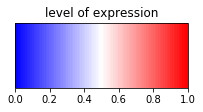

In [20]:
colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]
cm_heatmap = LinearSegmentedColormap.from_list(
    "mycm", colors, N=100)

a = np.array([[0,1]])
pl.figure(figsize=(3, 1.5))
pl.imshow(a, cmap=cm_heatmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(cax=cax, orientation="horizontal")
pl.title("level of expression");

In [12]:
# CD68, MacCSF1, MacTh1, TCR
expression_levels = np.log(rna_seq_df[ilc_classification_df["Sample ID"]].loc[[968, 1435, 2495, 171558]] + 0.5)
expression_levels = expression_levels.fillna(0)
expression_levels = expression_levels.sub(expression_levels.mean(axis=1), axis=0)
expression_levels = expression_levels.div(expression_levels.std(axis=1), axis=0)

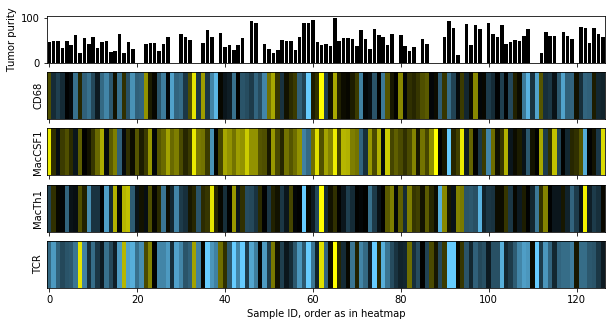

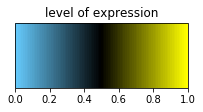

In [22]:
plt.rcParams["figure.figsize"] = 10,5
colors = [(0.4, 0.8, 1), (0, 0, 0), (1, 1, 0)]
cm = LinearSegmentedColormap.from_list(
    "mycm", colors, N=100)

x = range(len(ilc_classification_df["TumorPurity"]))
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, sharex=True)

ax1.bar(x, ilc_classification_df["TumorPurity"] * 100, color=(0,0,0))
ax1.set_ylabel("Tumor purity")
ax2.imshow(expression_levels.iloc[0].values.reshape((1, -1)), cmap=cm, aspect="auto")
ax2.set_yticks([])
ax2.set_ylabel("CD68")
ax3.imshow(expression_levels.iloc[1].values.reshape((1, -1)), cmap=cm, aspect="auto")
ax3.set_yticks([])
ax3.set_ylabel("MacCSF1")
ax4.imshow(expression_levels.iloc[2].values.reshape((1, -1)), cmap=cm, aspect="auto")
ax4.set_yticks([])
ax4.set_ylabel("MacTh1")
ax5.imshow(expression_levels.iloc[3].values.reshape((1, -1)), cmap=cm, aspect="auto")
ax5.set_yticks([])
ax5.set_ylabel("TCR")
plt.xlabel("Sample ID, order as in heatmap")
plt.savefig("img/tumor_purity_expression.png");

a = np.array([[0,1]])
pl.figure(figsize=(3, 1.5))
pl.imshow(a, cmap=cm)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(cax=cax, orientation="horizontal")
pl.title("level of expression");

Note that colormap, expression scaling and, most importantly, the order of samples is different than in the publication.
The publication doesn't provide enough information on those 